# **1. Data Preparation**

###**1.1 Data Cleaning**

In [22]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import re

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
from pathlib import Path


# Define file paths
true_csv = Path('/content/drive/My Drive/P487_m/True.csv')
fake_csv = Path('/content/drive/My Drive/P487_m/Fake.csv')

true_news = pd.read_csv(true_csv, encoding='latin1', delimiter='\t', on_bad_lines='skip', quotechar='"', header=None, names=['title', 'text'])  # Added names for columns
fake_news = pd.read_csv(fake_csv, encoding='latin1', delimiter='\t', quotechar='"', header=None, names=['title', 'text'])  # Added names for columns



# Display the dataframes
print(true_news.head())
print(fake_news.head())

                                               title text
0                        title,text,subject,date,,,,  NaN
1  As U.S. budget fight looms, Republicans flip t...  NaN
2  U.S. military to accept transgender recruits o...  NaN
3  Senior U.S. Republican senator: 'Let Mr. Muell...  NaN
4  FBI Russia probe helped by Australian diplomat...  NaN
                                               title  text
0                            title,text,subject,date   NaN
1   Donald Trump Sends Out Embarrassing New Year...   NaN
2   Drunk Bragging Trump Staffer Started Russian ...   NaN
3   Sheriff David Clarke Becomes An Internet Joke...   NaN
4   Trump Is So Obsessed He Even Has Obamas Name...   NaN


In [25]:
# Add a 'label' column to each dataset
fake_news['label'] = 0  # 0 for fake news
true_news['label'] = 1  # 1 for true news

In [26]:
# Combine datasets
news_data = pd.concat([fake_news, true_news], ignore_index=True)

# Shuffle the data
news_data = news_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display combined data info
print("\nCombined DataFrame Info:")
print(news_data.info())


Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44899 entries, 0 to 44898
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44899 non-null  object
 1   text    21 non-null     object
 2   label   44899 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None


###**1.2 Remove Missing Data**

In [27]:
# Check for missing values
missing_values = news_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Drop rows with missing values
news_data = news_data.dropna().reset_index(drop=True)


Missing Values in Each Column:
title        0
text     44878
label        0
dtype: int64


In [28]:
news_data

,title,text,label
0,Justice Dept. group studying national security...,"In July 2015, Fiat Chrysler Automobiles NV r...",1
1,Trump makes two conservative picks for Fed: NY...,One area Goodfriend may agree with Yellen is ...,1
2,"Factbox: Clinton's policies on economy, Islami...",Here are the proposals the former secretary o...,1
3,Trump sold all his shares in companies in June...,Trump had previously said he owned Boeing sha...,1
4,"Three in Florida, Virginia charged with voter ...",alleged to have tampered with absentee ballots...,1
5,Trump aide says endorsement of Ivanka's brand ...,""",politicsNews,""February 12, 2017"",,,,",1
6,Hackers target presidential campaigns: U.S. sp...,We have not seen anything (in the United Sta...,1
7,"Factbox: Clinton's policies on economy, Islami...",Here are the proposals the former secretary o...,1
8,U.S. House committee wants documents from form...,House of Representatives Intelligence Committ...,1
9,Trump administration goes on attack against le...,""",politicsNews,""August 4, 2017"",,,,",1


###**1.3 Handle Duplicates**

In [29]:
# Check for duplicates values
duplicate_rows = news_data[news_data.duplicated(subset=['text'])]
print("\nDuplicate Rows:")
print(duplicate_rows)

# Drop rows with duplicates values
news_data.drop_duplicates(subset=['text'], inplace=True)
print("\nAfter Removing Duplicates:")
print(news_data.info())


Duplicate Rows:
Empty DataFrame
Columns: [title, text, label]
Index: []

After Removing Duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21 non-null     object
 1   text    21 non-null     object
 2   label   21 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 636.0+ bytes
None


###**1.4 Remove Non-Textual Content**

In [30]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

news_data['text'] = news_data['text'].apply(clean_text)

###**1.5 Lowercase Conversion**

In [31]:
# Convert the 'text' columns to lowercase
news_data['text'] = news_data['text'].str.lower()
print(news_data['text'])

0     in july 2015 fiat chrysler automobiles nv reca...
1     one area goodfriend may agree with yellen is o...
2     here are the proposals the former secretary of...
3     trump had previously said he owned boeing shar...
4     alleged to have tampered with absentee ballots...
5                         politicsnews february 12 2017
6     we have not seen anything in the united states...
7     here are the proposals the former secretary of...
8     house of representatives intelligence committe...
9                            politicsnews august 4 2017
10                         politicsnews january 13 2016
11                         politicsnews october 13 2017
12    st martin s 27 99 10 little fires everywhere 1...
13    diane anderson said her father believed the tw...
14    appeals court judge neil gorsuch the day after...
15    u s senate 100 seats with a handful of races s...
16    i think what trump did by saying that they are...
17    based on google s corrective actions of re

# **2. Exploratory Data Analysis (EDA)**

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

###**2.1 Analyze Class Distribution**

<ipython-input-35-419ce061a317>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='label', data=news_data, kind='count', palette="pastel")
<ipython-input-35-419ce061a317>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.axes[0, 0].set_xticklabels(["Fake", "True"])


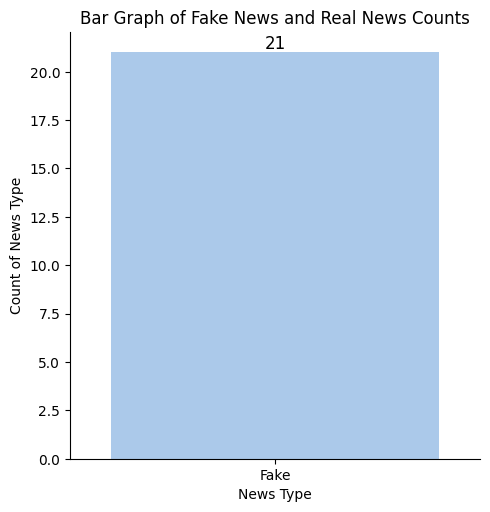

In [35]:


# Bar Graph of fake news and real news counts
g = sns.catplot(x='label', data=news_data, kind='count', palette="pastel")

# Add titles and axis labels
plt.title('Bar Graph of Fake News and Real News Counts')
plt.xlabel('News Type')
plt.ylabel('Count of News Type')

# Set the x-tick labels to more readable class names
# Get the current x-tick locations
x_ticks = g.axes[0, 0].get_xticks()

# Set the x-tick labels at the corresponding locations
g.axes[0, 0].set_xticklabels(["Fake", "True"])

# Add labels on top of the bars
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0], fontsize=12)

# Show the plot
plt.show()

###**2.2 Text Length Analysis**

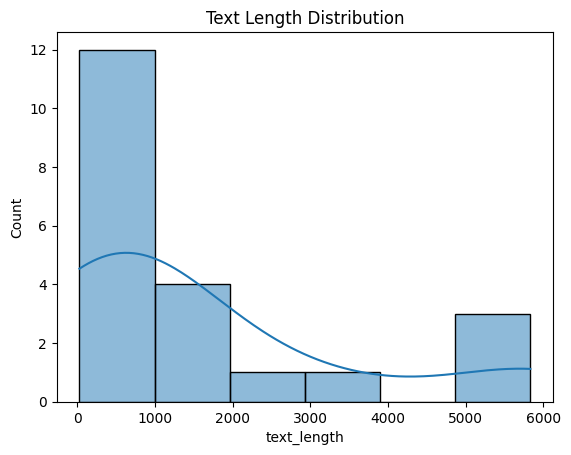

In [36]:
news_data['text_length'] = news_data['text'].apply(len)
sns.histplot(news_data['text_length'], kde=True)
plt.title('Text Length Distribution')
plt.show()

###**2.3 Word Frequency Analysis**

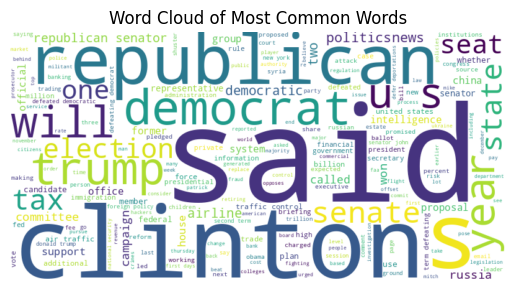

In [37]:
all_words = ' '.join(news_data['text'])
word_freq = Counter(all_words.split()).most_common(20)

# Visualize Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

####**2.4 Pie Chart of fake news and real news percentage**

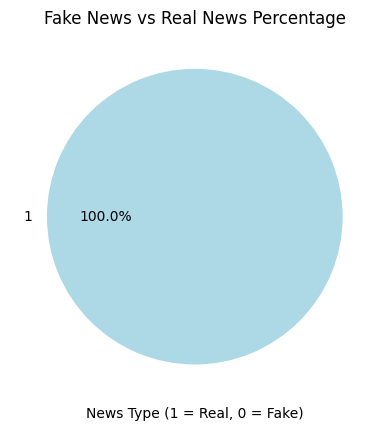

In [39]:
# Get the number of unique labels
num_labels = len(news_data["label"].value_counts())

# Create an explode list with the correct length
explode = [0] * num_labels  # Creates a list of zeros with length num_labels

plt.pie(news_data["label"].value_counts().values,
        explode=explode,  # Use the explode list with the correct length
        labels=news_data["label"].value_counts().index,
        autopct='%1.1f%%',  # Show percentage with one decimal place
        colors=['LightBlue', 'LightPink'])  # Custom colors for the slices

# Set the title and label
plt.title('Fake News vs Real News Percentage')
plt.xlabel('News Type (1 = Real, 0 = Fake)')

# Show the plot
plt.show()

####**2.5 Distribution of The Subject by Real and Fake Data**

# **3. Text Preprocessing**

     Prepare text for vectorization and machine learning.

###**3.1 Tokenization**

Split text into individual words or tokens.

In [43]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [44]:
from nltk.tokenize import word_tokenize
news_data['tokens'] = news_data['text'].apply(word_tokenize)

###**3.2 Stopwords Removal**

Remove common words (e.g., "and", "is", "the") using predefined stopword lists.


In [46]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
news_data['tokens'] = news_data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


###**3.3 Lemmatization**

Reduce words to their base forms to normalize text (e.g., "running" → "run").


In [48]:
from nltk.stem import WordNetLemmatizer

# Download WordNet dataset
import nltk
nltk.download('wordnet')

# Now initialize and use the lemmatizer
lemmatizer = WordNetLemmatizer()
news_data['tokens'] = news_data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /root/nltk_data...


###**3.4 Rejoin Tokens into Processed Text**

Combine tokens back into processed text for model input.

In [49]:
news_data['processed_text'] = news_data['tokens'].apply(lambda x: ' '.join(x))

In [50]:
#Inspect processed text
print(news_data['processed_text'].head())

0    july 2015 fiat chrysler automobile nv recalled...
1    one area goodfriend may agree yellen fed plan ...
2    proposal former secretary state made part argu...
3    trump previously said owned boeing share asked...
4    alleged tampered absentee ballot opening miami...
Name: processed_text, dtype: object


# **4. Feature Extraction**
        
    Feature extraction is about converting the preprocessed text into numerical representations that a machine learning model can process.

###**4.1 Vectorization**

**TF-IDF Vectorizer:**

Assigns weights to words based on their frequency and importance.

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming `news_data` contains the processed text and labels
# `processed_text` is the column with preprocessed news articles
# `label` is the target column (0 for fake, 1 for real)

# Splitting the dataset into training and testing sets
X = news_data['processed_text']
y = news_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

# Apply TF-IDF transformation
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# **5. Model Building**

###**5.1 Classification Models**

In [79]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**a) Logistic Regression :**

- Train and evaluate the Logistic Regression model.

In [81]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ... (rest of your code for data loading, preprocessing, etc.) ...

# Splitting the dataset into training and testing sets
X = news_data['processed_text']
y = news_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

# Apply TF-IDF transformation
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# --- Changes to handle single-class issue ---
# Check if y_train has more than one unique value
if len(y_train.unique()) < 2:
    print("Error: y_train contains only one class. Logistic Regression needs at least two classes.")
    # Handle the situation, e.g., gather more data or adjust the model
    # ... (your code to handle the issue) ...
else:
    # Continue with model training if there are at least two classes
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train_tfidf, y_train)

    # Predict on the test set
    y_pred_lr = lr_model.predict(X_test_tfidf)

    # Calculate metrics
    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

    # Evaluate
    print("\nLogistic Regression Results:")
    print(f"Accuracy: {lr_accuracy:.2f}")
    print(f"F1-Score: {lr_f1:.2f}")
    print(classification_report(y_test, y_pred_lr))
# --- End of changes ---


Error: y_train contains only one class. Logistic Regression needs at least two classes.


**b) Naive Bayes:**

- Train and evaluate the Naive Bayes model.

In [82]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Calculate Metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

# Evaluate
print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



**c) Support Vector Machine (SVM):**

- Train and evaluate the SVM model.


In [83]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Train SVM classifier with linear kernel
svm_model = LinearSVC(C=1.0, max_iter=1000)  # You can adjust C and max_iter as needed
svm_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Calculate Metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

# Evaluate
print("\nSVM Results:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"F1-Score: {svm_f1:.2f}")
print(classification_report(y_test, y_pred_svm))



ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

**d) XGBoost:**

- Train and evaluate the XGBoost model.

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Initialize XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,  # Avoid deprecation warnings
    eval_metric='logloss'     # Specify evaluation metric
)

# Train the model
xgb_model.fit(X_train_tfidf, y_train)  # Ensure X_train_tfidf is vectorized data

# Predictions
y_pred_xgb = xgb_model.predict(X_test_tfidf)  # Use the same vectorizer for test data

# Calculate Metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Evaluation
print("\nXGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"F1-Score: {xgb_f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]

**e) Decision Tree:**

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Train Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)  # Random state ensures reproducibility
dt_model.fit(X_train_tfidf, y_train)  # Fit the model on the TF-IDF vectorized training data

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_tfidf)

# Calculate Metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

# Evaluate the model
print("\nDecision Tree Results:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"F1-Score: {dt_f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Results:
Accuracy: 1.00
F1-Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



**f) Random Forest:**

In [89]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Train Random Forest classifier
rft_model = RandomForestClassifier(random_state=42, n_estimators=100)
rft_model.fit(X_train_tfidf, y_train)  # Fit model on training data

# Predict on test set
y_pred_rf = rft_model.predict(X_test_tfidf )

# Calculate Metrics
rft_accuracy = accuracy_score(y_test, y_pred_rf)  # Accuracy of the model
rft_f1 = f1_score(y_test, y_pred_rf, average='weighted')  # F1-score for the model

# Evaluate
print("\nRandom Forest Results:")
print(f"Accuracy: {rft_accuracy}")
print(f"F1-Score: {rft_f1}")
print(classification_report(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 1.0
F1-Score: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



**g) LightGBM (LGBM):**

In [59]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Convert features to float32 to avoid type errors
X_train_vec = X_train_tfidf.astype('float32')
X_test_vec = X_test_tfidf.astype('float32')

# Train LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100)
lgb_model.fit(X_train_vec, y_train)  # Fit model on training data

# Predict on test set
y_pred_lgb = lgb_model.predict(X_test_vec)

# Calculate Metrics
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)  # Accuracy of the model
lgb_f1 = f1_score(y_test, y_pred_lgb, average='weighted')  # F1-score for the model

# Evaluate
print("\nLightGBM Results:")
print(f"Accuracy: {lgb_accuracy}")
print(f"F1-Score: {lgb_f1}")
print(classification_report(y_test, y_pred_lgb))


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 16
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


###**5.2 Evaluate Model Performance**

**a) Logistic Regression:**

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.show()

NameError: name 'y_pred_lr' is not defined

**b) Naive Bayes:**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


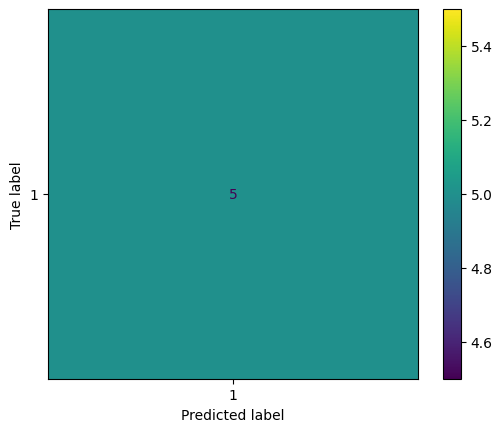

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.show()

**c) Support Vector Machine (SVM):**

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.show()

NameError: name 'y_pred_svm' is not defined

**d) XGBoost:**

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.show()

NameError: name 'y_pred_xgb' is not defined

**e) Decision Tree:**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


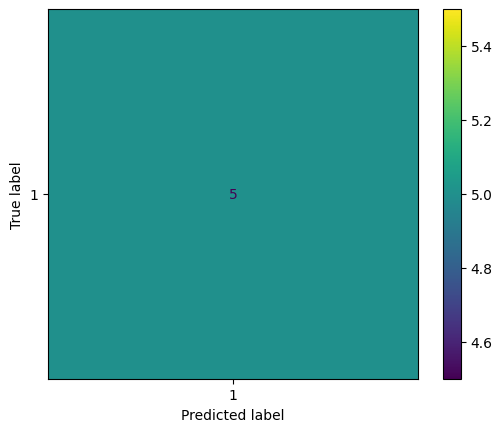

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.show()

**f) Random Forest:**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


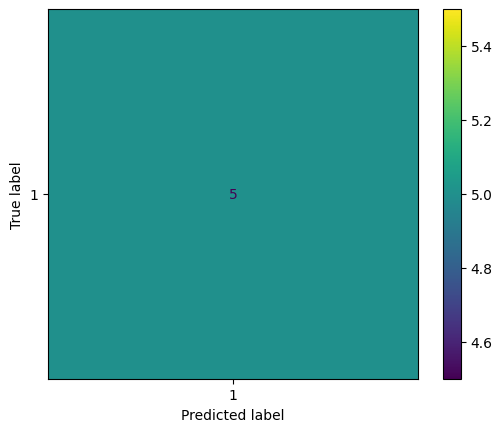

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

**g) LightGBM (LGBM):**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


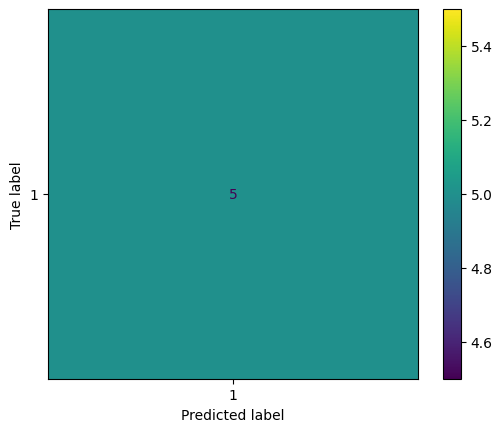

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgb)
plt.show()

###**5.3 Summary of Results**

In [90]:
# Summary of results
results = pd.DataFrame({
    'Model': [ 'Naive Bayes',  'Decision Tree', 'Random Forest', 'LightGBM'],
    'Accuracy': [ nb_accuracy, dt_accuracy, rft_accuracy, lgb_accuracy],
    'F1-Score': [ nb_f1,  dt_f1, rft_f1, lgb_f1]
})


print("\nModel Performance Comparison:")
print(results)



Model Performance Comparison:
           Model  Accuracy  F1-Score
0    Naive Bayes       1.0       1.0
1  Decision Tree       1.0       1.0
2  Random Forest       1.0       1.0
3       LightGBM       1.0       1.0


In [68]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [91]:
# Train Random Forest Classifier
rft_model = RandomForestClassifier(n_estimators=100, random_state=42)
rft_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [94]:
import gzip
import pickle

# Save compressed pickle file
with gzip.open('fake_news_model.pkl.gz', 'wb') as compressed_file:
    pickle.dump(model, compressed_file)

# Load compressed pickle file
with gzip.open('fake_news_model.pkl.gz', 'rb') as compressed_file:
    model = pickle.load(compressed_file)





import pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rft_model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)